[50849698.398170315, 39793415.25553067, 39793415.25553067]
[12.26858318776589, 11.120134415783276, 11.120134415783276]


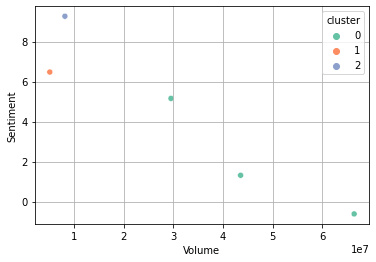

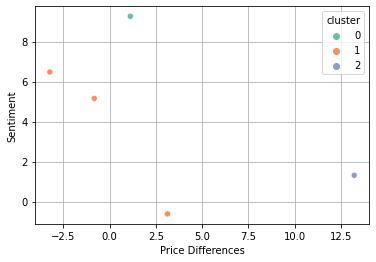

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand
from sklearn.model_selection import train_test_split


data_names = ['Title S&P 500 + GME Tickers','Title Sentiment Score','Title Negative Score','Title Neutral Score','Title Positive Score','Title Compound Score','Body S&P 500 + GME Tickers','Body Sentiment Score','Body Negative Score','Body Neutral Score','Body Positive Score','Body Compound Score', 'Timestamp']
data = pd.read_csv('sa.csv',
                   names = data_names)
data_names_gme = ['Date','Open','High','Low','Close','Adj Close','Volume']
data_gme = pd.read_csv('GME.csv',
                   names = data_names_gme)

#k-means clustering
def kmeans_clustering(all_vals,K,max_iter = 100, tol = pow(10,-3)):
    assignments = []
    centroids = rand.sample(all_vals, K)
    all_sse = []
    iters = 0

    for i in range(max_iter):
        ++iters

        assignments = []
        clust = [[] for a in range(K)]
        sse = 0

        for k in all_vals:
            eucDist = -1
            index = 0

            for cnt,l in enumerate(centroids):
                calcDist = np.linalg.norm(np.array(k) - np.array(l))

                if cnt == 0:
                    eucDist = calcDist
                elif calcDist < eucDist:
                    index = cnt
                    eucDist = calcDist

            sse += eucDist
            assignments.append(index)
            clust[index].append(k)

        all_sse.append(sse)

        if i > 0:
            if np.absolute(all_sse[i] - all_sse[i-1])/all_sse[i-1] <= tol:
                break

        for cnt,m in enumerate(clust):
            mean = np.mean(m, axis=0).tolist()
            centroids[cnt] = mean

    return assignments, centroids, all_sse, iters


#GME Sentiment

GME_Title = data.loc[data['Title S&P 500 + GME Tickers'].str.contains("GME")]
GME_Body = data.loc[data['Body S&P 500 + GME Tickers'].str.contains("GME")]

GME_Title_Jan = GME_Title.loc[GME_Title['Timestamp'].str.contains("2021-01")]
GME_Title_Feb = GME_Title.loc[GME_Title['Timestamp'].str.contains("2021-02")]
GME_Title_March = GME_Title.loc[GME_Title['Timestamp'].str.contains("2021-03")]
GME_Title_April = GME_Title.loc[GME_Title['Timestamp'].str.contains("2021-04")]
GME_Title_May = GME_Title.loc[GME_Title['Timestamp'].str.contains("2021-05")]

GME_Body_Jan = GME_Body.loc[GME_Body['Timestamp'].str.contains("2021-01")]
GME_Body_Feb = GME_Body.loc[GME_Body['Timestamp'].str.contains("2021-02")]
GME_Body_March = GME_Body.loc[GME_Body['Timestamp'].str.contains("2021-03")]
GME_Body_April = GME_Body.loc[GME_Body['Timestamp'].str.contains("2021-04")]
GME_Body_May = GME_Body.loc[GME_Body['Timestamp'].str.contains("2021-05")]


GME_Jan = data_gme.loc[data_gme['Date'].str.contains("2021-01")]
GME_Jan = GME_Jan.apply(pd.to_numeric, errors='ignore')
GME_Jan_Avg_V = GME_Jan['Volume'].mean()
GME_Jan_Price_Diff = GME_Jan['Open'].mean() - GME_Jan['Close'].mean()

GME_Feb = data_gme.loc[data_gme['Date'].str.contains("2021-02")]
GME_Feb = GME_Feb.apply(pd.to_numeric, errors='ignore')
GME_Feb_Avg_V = GME_Feb['Volume'].mean()
GME_Feb_Price_Diff = GME_Feb['Open'].mean() - GME_Feb['Close'].mean()

GME_March = data_gme.loc[data_gme['Date'].str.contains("2021-03")]
GME_March = GME_March.apply(pd.to_numeric, errors='ignore')
GME_March_Avg_V = GME_March['Volume'].mean()
GME_March_Price_Diff = GME_March['Open'].mean() - GME_March['Close'].mean()

GME_April = data_gme.loc[data_gme['Date'].str.contains("2021-04")]
GME_April = GME_April.apply(pd.to_numeric, errors='ignore')
GME_April_Avg_V = GME_April['Volume'].mean()
GME_April_Price_Diff = GME_April['Open'].mean() - GME_April['Close'].mean()

GME_May = data_gme.loc[data_gme['Date'].str.contains("2021-05")]
GME_May = GME_May.apply(pd.to_numeric, errors='ignore')
GME_May_Avg_V = GME_May['Volume'].mean()
GME_May_Price_Diff = GME_May['Open'].mean() - GME_May['Close'].mean()

GME_Reddit_Jan = data.loc[data['Timestamp'].str.contains("2021-01")]
GME_Reddit_Jan = GME_Reddit_Jan.apply(pd.to_numeric, errors='ignore')
GME_Reddit_Jan_Avg_S = (GME_Reddit_Jan['Title Sentiment Score'].mean() + GME_Reddit_Jan['Body Sentiment Score'].mean()) / 2

GME_Reddit_Feb = data.loc[data['Timestamp'].str.contains("2021-02")]
GME_Reddit_Feb = GME_Reddit_Feb.apply(pd.to_numeric, errors='ignore')
GME_Reddit_Feb_Avg_S = (GME_Reddit_Feb['Title Sentiment Score'].mean() + GME_Reddit_Feb['Body Sentiment Score'].mean()) / 2

GME_Reddit_March = data.loc[data['Timestamp'].str.contains("2021-03")]
GME_Reddit_March = GME_Reddit_March.apply(pd.to_numeric, errors='ignore')
GME_Reddit_March_Avg_S = (GME_Reddit_March['Title Sentiment Score'].mean() + GME_Reddit_March['Body Sentiment Score'].mean()) / 2

GME_Reddit_April = data.loc[data['Timestamp'].str.contains("2021-04")]
GME_Reddit_April = GME_Reddit_April.apply(pd.to_numeric, errors='ignore')
GME_Reddit_April_Avg_S = (GME_Reddit_April['Title Sentiment Score'].mean() + GME_Reddit_April['Body Sentiment Score'].mean()) / 2

GME_Reddit_May = data.loc[data['Timestamp'].str.contains("2021-05")]
GME_Reddit_May = GME_Reddit_May.apply(pd.to_numeric, errors='ignore')
GME_Reddit_May_Avg_S = (GME_Reddit_May['Title Sentiment Score'].mean() + GME_Reddit_May['Body Sentiment Score'].mean()) / 2

All_Vol = [GME_Jan_Avg_V, GME_Feb_Avg_V, GME_March_Avg_V, GME_April_Avg_V, GME_May_Avg_V]
All_Prices = [GME_Jan_Price_Diff, GME_Feb_Price_Diff, GME_March_Price_Diff, GME_April_Price_Diff, GME_May_Price_Diff]
All_Sent = [GME_Reddit_Jan_Avg_S, GME_Reddit_Feb_Avg_S, GME_Reddit_March_Avg_S, GME_Reddit_April_Avg_S, GME_Reddit_May_Avg_S]

GME_Vol_Sent = pd.DataFrame(
    {
        'All_Vol': All_Vol,
        'All_Sent': All_Sent
    }
)

GME_Vol_Price = pd.DataFrame(
    {
        'All_Prices': All_Prices,
        'All_Sent': All_Sent
    }
)

GME_Vol_Sent_DF = (GME_Vol_Sent[['All_Vol', 'All_Sent']].values).tolist()
assignments, centroids, all_sse, iters = kmeans_clustering(GME_Vol_Sent_DF,3,max_iter = 100, tol = pow(10,-3))
print(all_sse)
clust = []

for cnt,len in enumerate(GME_Vol_Sent_DF):
    index = assignments[cnt]
    clust.append((len[0], len[1], index))

df_Vol_Sent = pd.DataFrame(clust, columns=['Volume', 'Sentiment', 'cluster'])
plot = sb.scatterplot(x="Volume", y="Sentiment", data=df_Vol_Sent, hue="cluster", palette="Set2")
plt.grid()
plt.show()

GME_Vol_Price_DF = (GME_Vol_Price[['All_Prices', 'All_Sent']].values).tolist()
assignments, centroids, all_sse, iters = kmeans_clustering(GME_Vol_Price_DF,3,max_iter = 100, tol = pow(10,-3))
print(all_sse)
clust = []

for cnt,len in enumerate(GME_Vol_Price_DF):
    index = assignments[cnt]
    clust.append((len[0], len[1], index))

df_Sent_Price = pd.DataFrame(clust, columns=['Price Differences', 'Sentiment', 'cluster'])
plot = sb.scatterplot(x="Price Differences", y="Sentiment", data=df_Sent_Price, hue="cluster", palette="Set2")
plt.grid()
plt.show()